# KerasでCIFAR10カラー画像をCNNで学習

https://github.com/keras-team/keras/blob/master/examples/cifar10_cnn.py

上記Webサイトには、data augmentationあり。以下では、それは行っていない。


In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.2  #20%
session = tf.Session(config=config)
import keras
from keras import backend as K
K.set_session(session) 


Using TensorFlow backend.


In [2]:
# 各種 import
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

import numpy as np
# from scipy.misc import toimage
from PIL import Image
%matplotlib inline
import matplotlib.pyplot as plt


In [5]:
def plot_cifar10(X, y, result_dir):
    row, col, nclasses = 10,10,10
    plt.figure()
    fig, axes1 = plt.subplots(row,col,figsize=(10,10),gridspec_kw={'wspace':0, 'hspace':0.01})
    for targetClass in range(nclasses):
        targetIdx = []
        for i in range(len(y)):
            if y[i][0] == targetClass: # y has shape (50000,1) (2D)
                targetIdx.append(i)
        i = 0
        for idx in targetIdx[:10]:
            img = Image.fromarray(X[idx],'RGB')
            # img = toimage(X[idx])
            axes1[targetClass][i].set_axis_off(); 
            axes1[targetClass][i].imshow(img)
            i += 1
    plt.savefig(os.path.join(result_dir, 'Python-CIFAR10-Image-Examples.png'))
    plt.savefig(os.path.join(result_dir, 'Python-CIFAR10-Image-Examples.pdf'))
    plt.show()


<Figure size 432x288 with 0 Axes>

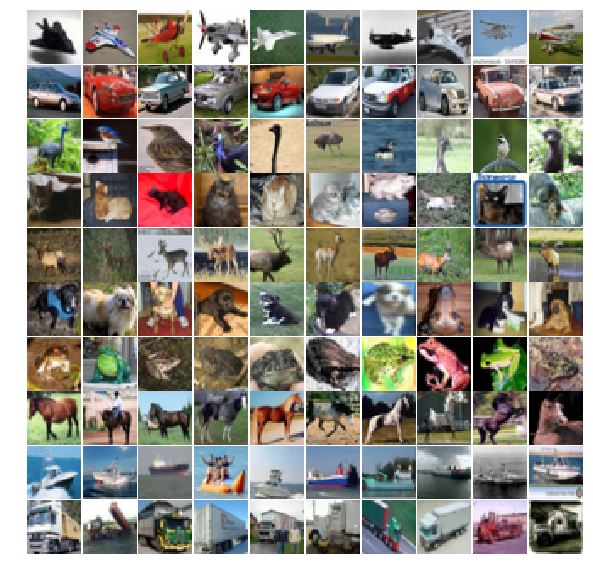

In [6]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
plot_cifar10(X_train, y_train, 'output')


# 
https://github.com/fchollet/keras/blob/master/examples/cifar10_cnn.py


In [7]:
batch_size = 64
num_classes = 10
epochs = 100
data_augmentation = True
num_predictions = 20

save_dir = os.path.join(os.getcwd(), 'output')
model_name = 'Python-CIFAR-CNN-Model.h5'

# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print('訓練データ・シェープ:', x_train.shape)
print(x_train.shape[0], '訓練サンプル数')
print(x_test.shape[0], 'テストサンプル数')


訓練データ・シェープ: (50000, 32, 32, 3)
50000 訓練サンプル数
10000 テストサンプル数


In [8]:
from keras.layers import Input
from keras.models import Model

input_shape = x_train.shape[1:]
print(input_shape)

inputs = Input(shape=input_shape)
x = Conv2D(32, kernel_size=(3, 3), padding='same',activation='relu')(inputs) # A
x = Conv2D(32, (3, 3), activation='relu')(x) # B
x = MaxPooling2D(pool_size=(2, 2))(x) # C
x = Dropout(0.25)(x)
x = Conv2D(64, (3, 3), padding='same')(x) # D
x = Activation('relu')(x)
x = Conv2D(64, (3, 3), activation='relu')(x) # E
x = MaxPooling2D(pool_size=(2, 2))(x) # F
x = Dropout(0.25)(x)
x = Flatten()(x) # G
x = Dense(512, activation='relu')(x) # H
x = Dropout(0.5)(x)
outputs = Dense(num_classes, activation='softmax')(x) # I

model = Model(inputs=[inputs], outputs=[outputs])

model.summary()


(32, 32, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 15, 15, 64)        0        

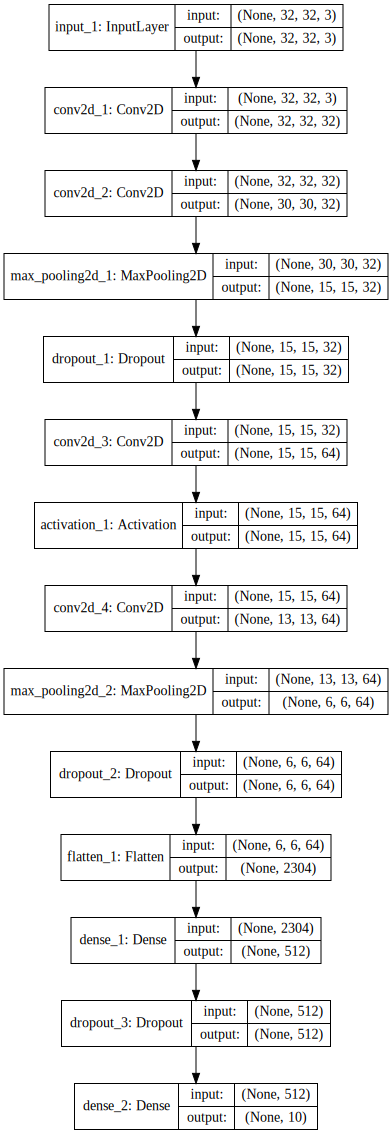

In [9]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, to_file='images/Python-CIFAR-CNN.jpg')

SVG(model_to_dot(model,show_shapes=True).create(prog='dot', format='svg'))


In [10]:
# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


In [11]:
callbacks_list = [
    keras.callbacks.EarlyStopping( monitor='loss',patience=5, ) # もし5エポック以上改善なければストップ
]
history = model.fit ( x_train, y_train, 
                     batch_size=batch_size, 
                     epochs=epochs,
                     callbacks=callbacks_list,
                     validation_data=(x_test, y_test))


Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 164s 3ms/step - loss: 1.8419 - acc: 0.3276 - val_loss: 1.6185 - val_acc: 0.4138
Epoch 2/100
50000/50000 [==============================] - 199s 4ms/step - loss: 1.5662 - acc: 0.4289 - val_loss: 1.6007 - val_acc: 0.4329
Epoch 3/100
50000/50000 [==============================] - 162s 3ms/step - loss: 1.4493 - acc: 0.4758 - val_loss: 1.4615 - val_acc: 0.4777
Epoch 4/100
50000/50000 [==============================] - 166s 3ms/step - loss: 1.3722 - acc: 0.5096 - val_loss: 1.2790 - val_acc: 0.5416
Epoch 5/100
50000/50000 [==============================] - 146s 3ms/step - loss: 1.3030 - acc: 0.5366 - val_loss: 1.2484 - val_acc: 0.5536
Epoch 6/100
50000/50000 [==============================] - 146s 3ms/step - loss: 1.2414 - acc: 0.5567 - val_loss: 1.1684 - val_acc: 0.5848
Epoch 7/100
50000/50000 [==============================] - 148s 3ms/step - loss: 1.1854 - acc: 0.5819 - val_loss: 1.

Epoch 58/100
50000/50000 [==============================] - 147s 3ms/step - loss: 0.5588 - acc: 0.8130 - val_loss: 0.6034 - val_acc: 0.7939
Epoch 59/100
50000/50000 [==============================] - 147s 3ms/step - loss: 0.5607 - acc: 0.8117 - val_loss: 0.6269 - val_acc: 0.7917
Epoch 60/100
50000/50000 [==============================] - 146s 3ms/step - loss: 0.5545 - acc: 0.8132 - val_loss: 0.6472 - val_acc: 0.7944
Epoch 61/100
50000/50000 [==============================] - 146s 3ms/step - loss: 0.5530 - acc: 0.8151 - val_loss: 0.6024 - val_acc: 0.8004
Epoch 62/100
50000/50000 [==============================] - 147s 3ms/step - loss: 0.5513 - acc: 0.8150 - val_loss: 0.6351 - val_acc: 0.7946
Epoch 63/100
50000/50000 [==============================] - 147s 3ms/step - loss: 0.5565 - acc: 0.8147 - val_loss: 0.6267 - val_acc: 0.7903
Epoch 64/100
50000/50000 [==============================] - 147s 3ms/step - loss: 0.5495 - acc: 0.8154 - val_loss: 0.6042 - val_acc: 0.7995
Epoch 65/100
50000/5

In [12]:
model.save('h5/Python-CIFAR-CNN.h5') # h5 (HDF5)
model.save_weights("h5/Python-CIFAR-CNN-weights.h5")

In [13]:
import pickle
with open('pkl/Python-CIFAR-CNN.pkl', 'wb') as h_file:
    pickle.dump(history.history, h_file) # save history


In [14]:
pred = model.predict(x_test)

# 結果を表示
print("予測:\n", pred)

予測:
 [[6.8615749e-03 1.2719695e-02 2.9564027e-03 ... 2.6788132e-03
  1.6262357e-01 7.4210246e-03]
 [1.3827440e-05 1.0560176e-04 8.9471529e-13 ... 8.9561333e-17
  9.9988043e-01 1.0293247e-07]
 [3.6525145e-02 6.0251974e-02 8.2454981e-06 ... 4.7403901e-06
  8.9582306e-01 7.3030554e-03]
 ...
 [4.4361026e-05 2.5414879e-06 3.3246537e-03 ... 9.4350196e-02
  1.2123072e-05 5.1516843e-05]
 [2.4378696e-01 7.1880269e-01 1.0671461e-03 ... 6.7470864e-05
  6.5185600e-07 2.4604907e-03]
 [4.3243471e-09 5.9717009e-10 1.5618404e-07 ... 9.9968719e-01
  1.8647171e-12 1.0120649e-09]]


In [15]:
# Evaluate model with test data set and share sample prediction results
score = model.evaluate(x_test, y_test, verbose=0)
print('テストデータの損失:', score[0])
print('テストデータの精度:', score[1])


テストデータの損失: 0.6343422966003418
テストデータの精度: 0.7954


In [16]:
# Matplotlibのフォントの制御（大きさや種類）
%matplotlib inline
import numpy as np # Numpy
import matplotlib
import matplotlib.pyplot as plt # 描画ライブラリ
print (matplotlib.rcParams.get('font.family'))
import matplotlib.font_manager as fm
import matplotlib.patheffects as path_effects

font_prop = fm.FontProperties()  
font_prop.set_style('normal')
font_prop.set_weight('light')
font_prop.set_size('12')

fp2 = font_prop.copy()# フォントプロパティ(FP)をコピー
fp2.set_size('20')# フォントプロパティ(FP)をコピー
fp2.set_family('serif')# フォントはSerif(明朝体など）に設定

['sans-serif']


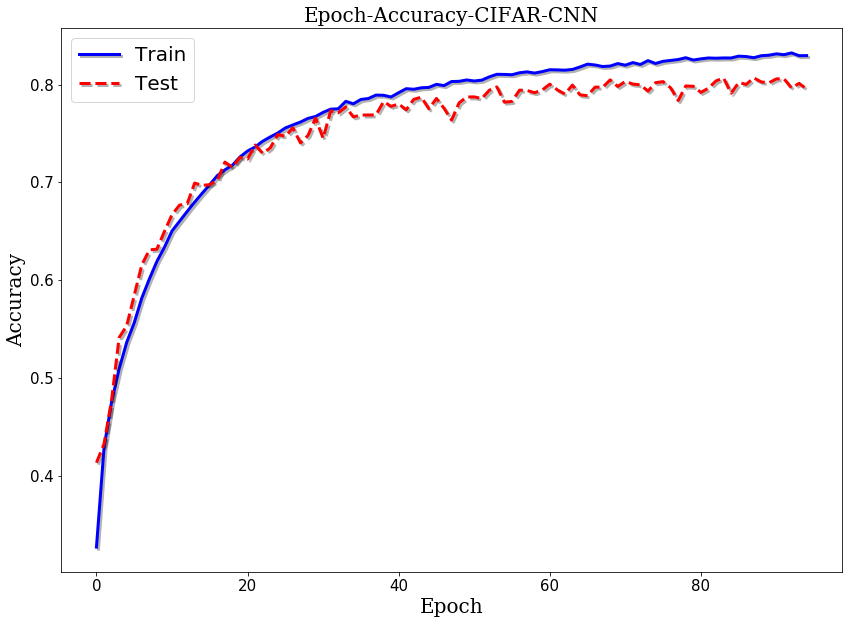

In [17]:
% matplotlib inline
import matplotlib.pyplot as plt

# 精度グラフの描画　% matplotlib inline
plt.figure(figsize=(14,10))

plt.plot(history.history['acc'], 
         color='b', 
         linestyle='-', 
         linewidth=3, 
         path_effects=[path_effects.SimpleLineShadow(),
                       path_effects.Normal()])
plt.plot(history.history['val_acc'], 
         color='r', 
         linestyle='--',
         linewidth=3,
         path_effects=[path_effects.SimpleLineShadow(),
                       path_effects.Normal()])

plt.tick_params(labelsize=15)
plt.title('Epoch-Accuracy-CIFAR-CNN',fontsize=25,font_properties=fp2)
plt.ylabel('Accuracy',fontsize=20,font_properties=fp2)
plt.xlabel('Epoch',fontsize=20,font_properties=fp2)
plt.legend(['Train', 'Test'], loc='best', fontsize=20)

plt.savefig('pdf/Epoch-Accuracy-CIFAR-CNN.pdf')
plt.show()

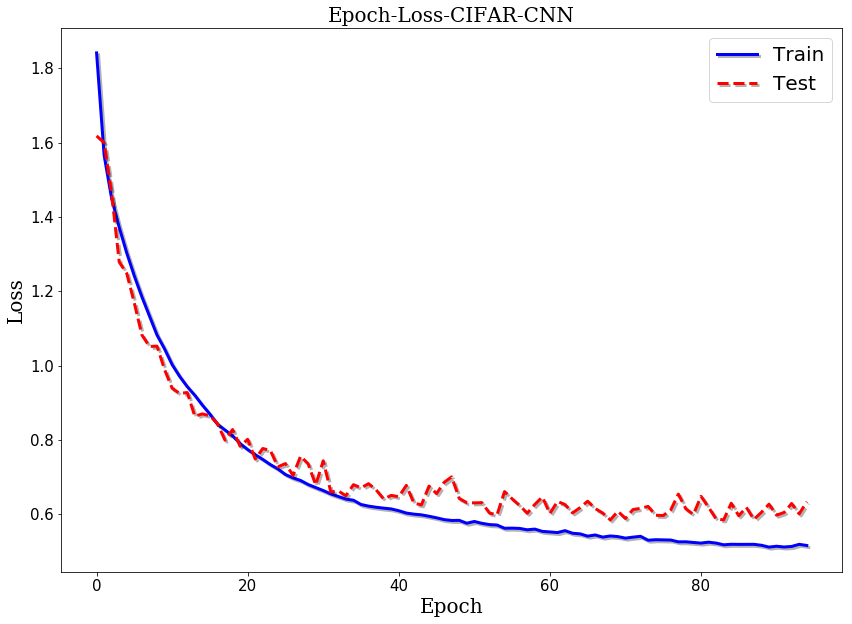

In [18]:
# 損失グラフの描画　% matplotlib inline
plt.figure(figsize=(14,10))

plt.plot(history.history['loss'], 
         color='b', 
         linestyle='-', 
         linewidth=3, 
         path_effects=[path_effects.SimpleLineShadow(),
                       path_effects.Normal()])
plt.plot(history.history['val_loss'], 
         color='r', 
         linestyle='--',
         linewidth=3,
         path_effects=[path_effects.SimpleLineShadow(),
                       path_effects.Normal()])
plt.tick_params(labelsize=15)
plt.title('Epoch-Loss-CIFAR-CNN',fontsize=25,font_properties=fp2)
plt.ylabel('Loss',fontsize=20,font_properties=fp2)
plt.xlabel('Epoch',fontsize=20,font_properties=fp2)
plt.legend(['Train', 'Test'], loc='best', fontsize=20)
plt.savefig('pdf/Epoch-Loss-CIFAR-CNN.pdf')
plt.show()

In [19]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred = model.predict(x_test)
print(y_pred)


[[6.8615749e-03 1.2719695e-02 2.9564027e-03 ... 2.6788132e-03
  1.6262357e-01 7.4210246e-03]
 [1.3827440e-05 1.0560176e-04 8.9471529e-13 ... 8.9561333e-17
  9.9988043e-01 1.0293247e-07]
 [3.6525145e-02 6.0251974e-02 8.2454981e-06 ... 4.7403901e-06
  8.9582306e-01 7.3030554e-03]
 ...
 [4.4361026e-05 2.5414879e-06 3.3246537e-03 ... 9.4350196e-02
  1.2123072e-05 5.1516843e-05]
 [2.4378696e-01 7.1880269e-01 1.0671461e-03 ... 6.7470864e-05
  6.5185600e-07 2.4604907e-03]
 [4.3243471e-09 5.9717009e-10 1.5618404e-07 ... 9.9968719e-01
  1.8647171e-12 1.0120649e-09]]


In [20]:
# 混合行列の描画関数の定義
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import pylab
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,fontsize=25)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=15)
    # plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45,fontsize=15)
    plt.yticks(tick_marks, classes,fontsize=15)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center", fontsize=15,
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label',fontsize=20)
    plt.xlabel('Predicted label',fontsize=20)

In [21]:
# 未知データのクラスの予測
pred_classes = np.argmax(pred, axis=1)
print(pred_classes)

[3 8 8 ... 5 1 7]


Confusion matrix, without normalization
[[875  13 105  30  24  24   7  20  56  26]
 [ 18 921   9  15   4   8   7   3  24  65]
 [  9   0 618  36  36  27  28  15   0   1]
 [  7   1  51 632  40 155  43  17   2   2]
 [  3   0  72  47 748  27  30  21   1   2]
 [  0   0  29  83  16 642   6  18   2   0]
 [  2   1  48  54  27  14 849   1   2   1]
 [ 10   0  41  49  84  71   8 887   1   2]
 [ 42  14  15  22  13  12  11   1 897  16]
 [ 34  50  12  32   8  20  11  17  15 885]]


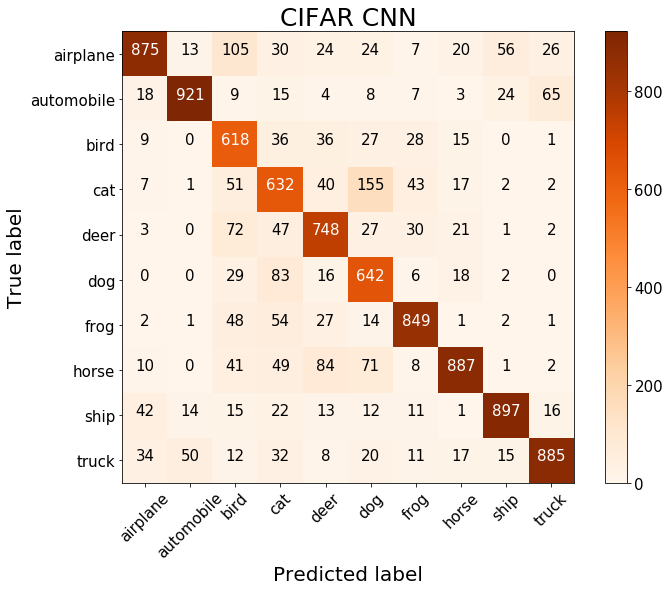

In [22]:
from sklearn.metrics import confusion_matrix # 混合行列
actual = np.argmax(y_test, axis=1)
cm = confusion_matrix(pred_classes, actual)

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plot_confusion_matrix(cm, classes=classes, title='CIFAR CNN')
plt.show()


In [23]:
count = 0
total = actual.shape[0]
for i in range(total):
    if actual[i] == pred_classes[i]:
        count += 1
accuracy = float(count)/total
print("分類精度 = ",accuracy)


分類精度 =  0.7954
